<a href="https://colab.research.google.com/github/juandag97/Python-Notebooks/blob/master/signLanguage.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!wget --no-check-certificate https://storage.googleapis.com/platzi-tf2/sign-language-img.zip -O /tmp/sign-language-img.zip

--2021-12-03 21:10:26--  https://storage.googleapis.com/platzi-tf2/sign-language-img.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 172.217.218.128, 142.250.153.128, 142.250.145.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|172.217.218.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 24265584 (23M) [application/zip]
Saving to: ‘/tmp/sign-language-img.zip’

/tmp/sign-language- 100%[===================>]  23.14M  60.8MB/s    in 0.4s    

2021-12-03 21:10:27 (60.8 MB/s) - ‘/tmp/sign-language-img.zip’ saved [24265584/24265584]



In [2]:
import os 
import zipfile 

local_zip = "/tmp/sign-language-img.zip"
zip_ref = zipfile.ZipFile(local_zip, "r")
zip_ref.extractall("/tmp/sign-language-img")
zip_ref.close()

In [4]:
import numpy as np 
%matplotlib inline 
import matplotlib.pyplot as plt 
import matplotlib.image as mpimg 
import string 
import tensorflow as tf 
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [5]:
train_dir = "/tmp/sign-language-img/Train"
test_dir = "/tmp/sign-language-img/Test"

In [6]:
train_datagen = ImageDataGenerator(rescale=1/255)
test_datagen = ImageDataGenerator(rescale=1/255, validation_split=0.2)

In [8]:
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size = (28,28),
    batch_size = 128,
    class_mode = "categorical",
    color_mode = "grayscale",
    subset = "training"
)

validation_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size = (28,28),
    batch_size = 128,
    class_mode = "categorical",
    color_mode = "grayscale",
    subset = "validation"
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size = (28,28),
    batch_size = 128,
    class_mode = "categorical",
    color_mode = "grayscale",
)

Found 27455 images belonging to 24 classes.
Found 1425 images belonging to 24 classes.
Found 7172 images belonging to 24 classes.


In [9]:
classes = [char for char in string.ascii_uppercase if char != "J" if char != "Z"]

In [10]:
classes

['A',
 'B',
 'C',
 'D',
 'E',
 'F',
 'G',
 'H',
 'I',
 'K',
 'L',
 'M',
 'N',
 'O',
 'P',
 'Q',
 'R',
 'S',
 'T',
 'U',
 'V',
 'W',
 'X',
 'Y']

In [16]:
def plotImages(images_arr):
  fig, axes = plt.subplots(1, 5, figsize=(10,10))
  axes = axes.flatten()
  for img, ax in zip(images_arr, axes):
    ax.imshow(img[:, :,0])
    ax.axis("off")
  plt.tight_layout()
  plt.show()

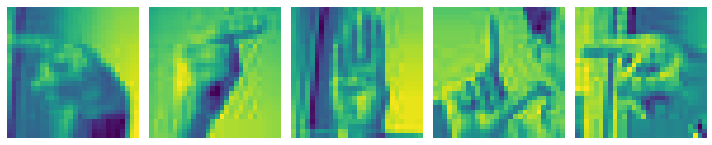

In [17]:
sample_training_images, _ = next(train_generator)
plotImages(sample_training_images[:5])